In [87]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [88]:
################ 12) Reading automobile dataset 
df= pd.read_csv("../Dataset/Automobile.csv")

In [89]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [90]:
######## checking wheather it has any null value
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [92]:
############ Converting type of column normalized losses from object to int

mean=df[df["normalized-losses"] != "?"]["normalized-losses"]
mean = mean.astype(int)
mean=mean.mean()
normalized_losses =df["normalized-losses"].tolist()

for i in range(len(normalized_losses)):
    if(normalized_losses[i]=="?"):
        normalized_losses[i] = mean

df["normalized-losses"] =normalized_losses
df["normalized-losses"]= df["normalized-losses"].astype(int)

In [93]:
df["normalized-losses"].mean()

122.0

In [94]:
########## Coverting all String column to int type

df["make"]=df["make"].factorize()[0]
df["fuel-type"]=df["fuel-type"].factorize()[0]
df["aspiration"]=df["aspiration"].factorize()[0]
df["num-of-doors"]=df["num-of-doors"].factorize()[0]
df["body-style"]=df["body-style"].factorize()[0]
df["drive-wheels"]=df["drive-wheels"].factorize()[0]
df["engine-location"]=df["engine-location"].factorize()[0]
df["engine-type"]=df["engine-type"].factorize()[0]
df["num-of-cylinders"]=df["num-of-cylinders"].factorize()[0]
df["fuel-system"]=df["fuel-system"].factorize()[0]

In [95]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,0,0,0,0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,0,0,1,2,1,0,99.8,...,109,0,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,1,0,0,1,2,2,0,99.4,...,136,0,3.19,3.4,8.0,115,5500,18,22,17450


In [96]:
############ Converting type of column bore from object to float

mean=df[df["bore"] != "?"]["bore"].astype(float)
mean=mean.mean()
bore =df["bore"].tolist()

for i in range(len(bore)):
    if(bore[i]=="?"):
        bore[i] = float(mean)
    else:
        bore[i] = float(bore[i])

df["bore"] = bore
df["bore"] = df["bore"].astype(float)

In [97]:
############ Converting type of column stroke from object to float

mean=df[df["stroke"] != "?"]["stroke"].astype(float)
mean=mean.mean()
stroke =df["stroke"].tolist()

for i in range(len(stroke)):
    if(stroke[i]=="?"):
        stroke[i] = float(mean)
    else:
        stroke[i] = float(stroke[i])

df["stroke"] = stroke
df["stroke"] = df["stroke"].astype(float)

In [98]:
############ Converting type of column horsepower from object to int

mean=df[df["horsepower"] != "?"]["horsepower"].astype(float)
mean=mean.mean()
horsepower =df["horsepower"].tolist()

for i in range(len(horsepower)):
    if(horsepower[i]=="?"):
        horsepower[i] = float(mean)
    else:
        horsepower[i] = float(horsepower[i])
        
df["horsepower"] = horsepower
df["horsepower"] = df["horsepower"].astype(int)

In [99]:
############ Converting type of column peak-rpm from object to int

mean=df[df["peak-rpm"] != "?"]["peak-rpm"].astype(float)
mean=mean.mean()
peak_rpm =df["peak-rpm"].tolist()

for i in range(len(peak_rpm)):
    if(peak_rpm[i]=="?"):
        peak_rpm[i] = float(mean)
    else:
        peak_rpm[i] = float(peak_rpm[i])
        
df["peak-rpm"] = peak_rpm
df["peak-rpm"] = df["peak-rpm"].astype(int)

In [100]:
############ Converting type of column price from object to int

mean=df[df["price"] != "?"]["price"].astype(float)
mean=mean.mean()
price =df["price"].tolist()

for i in range(len(price)):
    if(price[i]=="?"):
        price[i] = float(mean)
    else:
        price[i] = float(price[i])
        
df["price"] = price
df["price"] = df["price"].astype(int)

In [101]:
############# checking type of all column after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int32
make                 205 non-null int64
fuel-type            205 non-null int64
aspiration           205 non-null int64
num-of-doors         205 non-null int64
body-style           205 non-null int64
drive-wheels         205 non-null int64
engine-location      205 non-null int64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null int64
num-of-cylinders     205 non-null int64
engine-size          205 non-null int64
fuel-system          205 non-null int64
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-null int32
p

In [102]:
##################### Spliting dataset into training set and testing set 

x = df.iloc[:,:25]
y= df.iloc[:,25]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [103]:
############## Initialising linearRegression object and training model with training dataset

reg = LinearRegression().fit(x_train,y_train)

In [104]:
################# Predicting output of test dataset

var=reg.predict(x_test)

In [105]:
var

array([10875.00497014, 11142.47846928,  7567.63320255,  9686.4518164 ,
       11515.49673254,  9630.47737007,  6681.98723571, 18041.52315583,
       12147.22531617, 19760.22840573, 15257.67959251, 19247.44005947,
       14809.27236324, 20120.76958857, 19939.16802469, 14048.92642648,
        7006.39644455,  5775.91748055, 10871.61807081, 35457.82563111,
       14648.94954222, 19377.87247711, 15713.76696912, 13473.71604787,
        5722.65759956, 34028.        , 15996.41978767,  7591.75083312,
       16106.47423759, 13083.12583545,  7279.07701084, 27237.30738188,
        7958.53058898,  6536.17876334,  6179.93861745,  7851.18928513,
       21894.30094765,  7128.8815181 , 10502.85659319,  8802.45444479,
        8773.39712183])

In [106]:
############ Checking accuracy of above LinearRegression model

r2_score(y_test, var)

0.8709664042238301

In [108]:
################## 13) The Pima Indians Diabetes Binary Classification

In [109]:
############ Reading Deabetes dataset

df1= pd.read_csv("../Dataset/diabetes.csv")

In [110]:
df1.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant                                                    768 non-null int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null int64
Diastolic blood pressure (mm Hg)                                            768 non-null int64
Triceps skin fold thickness (mm)                                            768 non-null int64
2-Hour serum insulin (mu U/ml)                                              768 non-null int64
Body mass index (weight in kg/(height in m)^2)                              768 non-null float64
Diabetes pedigree function                                                  768 non-null float64
Age (years)                                                                 768 non-null int64
Class variable (0 or 1)                                                     768 non-null int64
dtypes: float64(2), int64(7)
memory u

In [112]:
############ Checking for null value

df1.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [113]:
################ Spliting dataset into training set and testing set

x= df1.iloc[:,:8]
y = df1.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [116]:
############# Initialising logisticRegression model and training it

clf = LogisticRegression().fit(x_train,y_train)

c:\python27\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [117]:
################ Predicting output using test dataset

var= clf.predict(x_test)

In [118]:
var

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [119]:
############# Checking for its confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test, var)
cnf_matrix

array([[137,  17],
       [ 32,  45]], dtype=int64)

In [120]:
########### 14) Performing k-mean clusturing on hotel dataset

In [122]:
############# Reading hotel dataset
df2= pd.read_csv("../Dataset/hotel.csv")

In [125]:
df2.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [128]:
import matplotlib.pyplot as plt

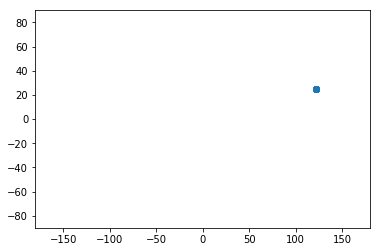

In [130]:
############# Scatter plot of location data

plt.scatter(df2["lon"],df2["lat"])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [131]:
################# Initialising 3 clustures

kmeans= KMeans(3)

In [132]:
x= df2.iloc[:,1:3]

In [134]:
x.head()

,lat,lon
0,25.137793,121.51495
1,25.057854,121.52409
2,25.137163,121.50544
3,25.039248,121.56741
4,25.052057,121.52831


In [135]:
############### Fitting data in above defined clustures

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [136]:
############ Predicting using x 

cluster = kmeans.fit_predict(x)

In [139]:
cluster

array([1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2])

In [140]:
df3 = df2.copy()

In [142]:
df3["Cluster"] = cluster

In [143]:
df3.head()

,address,lat,lon,title,district,Cluster
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou,1
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan,2
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou,1
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi,0
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan,2


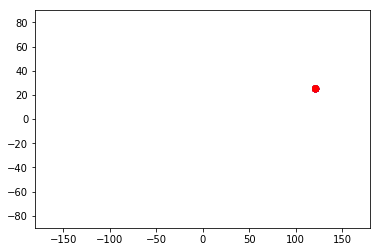

In [145]:
################ Ploting all 3 clustures

plt.scatter(df3["lon"],df3["lat"],c= df3["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()